In [21]:
%matplotlib inline

import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

In [22]:
url = "https://data.cityofnewyork.us/api/views/7yc5-fec2/rows.json?accessType=DOWNLOAD"
data = requests.get(url)


columns = data.json()['meta']['view']['columns']

columns_name_array = []
for columns_name in columns:
    columns_name_array.append(columns_name['name'])

In [23]:
data = data.json()['data']

data_row = []
for rows in data:
    data_row.append(rows)


In [24]:
# creating data frame

df = pd.DataFrame(data_row, columns=columns_name_array)


In [25]:
df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,DBN,School Name,...,MATH #Level 1,MATH %Level 1,MATH #Level 2,MATH %Level 2,MATH #Level 3,MATH %Level 3,MATH #Level 4,MATH %Level 4,MATH #L3+L4,MATH %L3 + L4
0,row-ikqi~z2hn.9idy,00000000-0000-0000-9FDE-50A3AE30A334,0,1502396671,None,1502396671,None,{ },01M015,P.S. 015 Roberto Clemente,...,25,0.46296296296296297,18,0.3333333333333333,s,s,s,s,11,0.2037037037037037
1,row-vtcu.vp72_i23e,00000000-0000-0000-60A5-4E0172B065B1,0,1502396671,None,1502396671,None,{ },01M015,P.S. 015 Roberto Clemente,...,s,s,s,s,s,s,s,s,s,s
2,row-xzbn.iezm-bng4,00000000-0000-0000-48A5-A779C0810B37,0,1502396671,None,1502396671,None,{ },01M015,P.S. 015 Roberto Clemente,...,s,s,s,s,s,s,s,s,s,s
3,row-9gwu_4zpd_5bfx,00000000-0000-0000-ED4A-26B2D08EA5BA,0,1502396671,None,1502396671,None,{ },01M015,P.S. 015 Roberto Clemente,...,25,0.46296296296296297,18,0.3333333333333333,s,s,s,s,11,0.2037037037037037
4,row-3wp3~vkc4.3igb,00000000-0000-0000-121D-A89251FCE874,0,1502396671,None,1502396671,None,{ },01M015,P.S. 015 Roberto Clemente,...,11,0.5238095238095238,6,0.2857142857142857,s,s,s,s,s,s


In [26]:
df.columns 

Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'DBN', 'School Name', 'Category', 'Year',
       'Total Enrollment', '#Grade K', '#Grade 1', '#Grade 2', '#Grade 3',
       '#Grade 4', '#Grade 5', '#Grade 6', '#Grade 7', '#Grade 8', '#Female',
       '%Female', '#Male', '%Male', '#Asian', '%Asian', '#Black', '%Black',
       '#Hispanic', '%Hispanic', '#Other', '%Other', '#White', '%White ',
       '#ELL Spanish ', '%ELL Spanish', '#ELL Chinese', '%ELL Chinese',
       '#ELL Bengali', '%ELL Bengali', '#ELL Arabic', '%ELL Arabic',
       '#ELL Haitian Creole', '%ELL Haitian Creole', '#ELL French',
       '%ELL French', '#ELL Russian', '%ELL Russian', '#ELL Korean',
       '%ELL Korean', '#ELL Urdu', '%ELL Urdu', '#ELL Other', '%ELL Other',
       'ELA #Test Takers', 'ELA #Level 1', 'ELA %Level 1', 'ELA #Level 2',
       'ELA %Level 2', 'ELA #Level 3', 'ELA %Level 3', 'ELA #Level 4',
       'ELA %Level 4', 'ELA #L3+L4', 'ELA %L3+L4

In [27]:
sorted_df = df.iloc[:, 9:]

#cleanning and preaparing data

sorted_df['Total Enrollment'] = pd.to_numeric(sorted_df['Total Enrollment'])

col = ['#Asian', '#Black', '#Hispanic', '#Other', '#White', "Math #Test Takers", "MATH #Level 1","MATH #Level 2","MATH #Level 3", "MATH #Level 4", "MATH #L3+L4",
      'ELA #Test Takers', 'ELA #Level 1', 'ELA #Level 2', 'ELA #Level 3', 'ELA #Level 4', 'ELA #L3+L4',"#Male", "#Female",
      '#Grade K','#Grade 1', '#Grade 2', '#Grade 3', '#Grade 4', '#Grade 5', '#Grade 6','#Grade 7', '#Grade 8']

sorted_df[col] = sorted_df[col].replace('s', 1)

sorted_df[col] = sorted_df[col].replace('No Data', 0)

sorted_df[col] = sorted_df[col].replace(' ', 0)

sorted_df[col] = sorted_df[col].apply(pd.to_numeric)

sorted_df.head()

,School Name,Category,Year,Total Enrollment,#Grade K,#Grade 1,#Grade 2,#Grade 3,#Grade 4,#Grade 5,...,MATH #Level 1,MATH %Level 1,MATH #Level 2,MATH %Level 2,MATH #Level 3,MATH %Level 3,MATH #Level 4,MATH %Level 4,MATH #L3+L4,MATH %L3 + L4
0,P.S. 015 Roberto Clemente,All Students,2015-16,162.0,32,33,39,23,17,18,...,25,0.46296296296296297,18,0.3333333333333333,1,s,1,s,11,0.2037037037037037
1,P.S. 015 Roberto Clemente,Attend school outside district of residence,2015-16,37.0,7,7,11,7,1,1,...,1,s,1,s,1,s,1,s,1,s
2,P.S. 015 Roberto Clemente,English Language Learners,2015-16,16.0,1,1,1,1,1,1,...,1,s,1,s,1,s,1,s,1,s
3,P.S. 015 Roberto Clemente,Poverty,2015-16,162.0,32,33,39,23,17,18,...,25,0.46296296296296297,18,0.3333333333333333,1,s,1,s,11,0.2037037037037037
4,P.S. 015 Roberto Clemente,Reside in temporary housing,2015-16,65.0,12,14,17,10,1,1,...,11,0.5238095238095238,6,0.2857142857142857,1,s,1,s,1,s


In [28]:
group_by_cat = sorted_df.groupby(by="Category").agg({"Total Enrollment": "sum", "#Asian": "sum", "#Black":"sum", "#Hispanic":"sum", "#Other":"sum", "#White":"sum"})

group_by_cat

,Total Enrollment,#Asian,#Black,#Hispanic,#Other,#White
Category,,,,,,
All Students,639829.0,108662,142162,266865,11266,105187
Attend school outside district of residence,72402.0,9516,23343,28461,1772,8399
English Language Learners,98699.0,24051,3649,60544,1166,8755
Poverty,542491.0,92654,127679,248049,7366,60264
Reside in temporary housing,62172.0,5029,19984,33534,1202,2064
Students with Disabilities,119871.0,8091,30289,60380,1499,16967


In [29]:
def view_graph(graph):
    graph.yaxis.grid(color="black")
    graph.set_facecolor("white")
    graph.set_xticklabels(labels=['All Students','Attend school \n outside district \n  of residence', 'English \n Language \n Learners', 'Poverty','Reside in \n temporary \n housing','Students \n with \n Disabilities'],rotation=360)

    graph.spines['bottom'].set_color('0.5')
    graph.spines['top'].set_color('0.5')
    graph.spines['right'].set_color('0.5')
    graph.spines['left'].set_color('0.5')

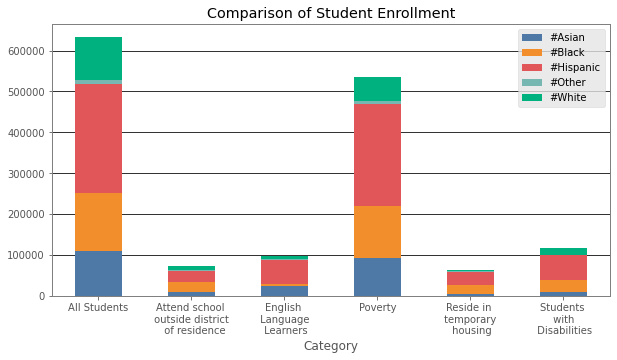

In [30]:
colors = ["#4e79a7", "#f28e2b","#e15759", '#76b7b2', '#00b180']

graph = group_by_cat.loc[:, ['#Asian', '#Black', '#Hispanic', '#Other', '#White']].plot.bar(stacked=True, color=colors, figsize=(10,5), title="Comparison of Student Enrollment")

view_graph(graph)

In [31]:
group_by_math = sorted_df.groupby(by="Category").agg({"Math #Test Takers": "sum", "MATH #Level 1": "sum", "MATH #Level 2":"sum", "MATH #Level 3":"sum", "MATH #Level 4":"sum", "MATH #L3+L4":"sum"})

group_by_math

,Math #Test Takers,MATH #Level 1,MATH #Level 2,MATH #Level 3,MATH #Level 4,MATH #L3+L4
Category,,,,,,
All Students,385135,121629,120199,71393,68388,143220
Attend school outside district of residence,49299,15495,14759,7252,8611,17388
English Language Learners,49059,28467,13424,2984,2283,6209
Poverty,337375,114883,109026,58772,50928,113288
Reside in temporary housing,34463,16501,10203,2619,2205,6109
Students with Disabilities,75662,46750,19892,3069,2483,7938


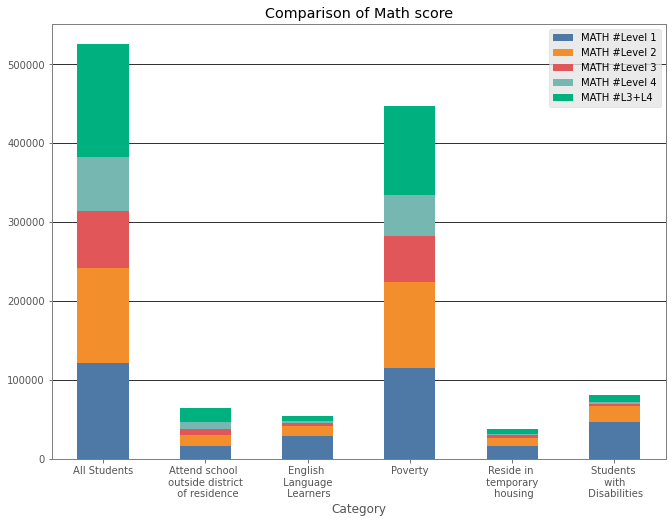

In [32]:
colors = ["#4e79a7", "#f28e2b","#e15759", '#76b7b2', '#00b180']

graph_by_math = group_by_math.loc[:, ["MATH #Level 1","MATH #Level 2","MATH #Level 3", "MATH #Level 4", "MATH #L3+L4"]].plot.bar(stacked=True, color=colors, figsize=(11,8), title="Comparison of Math score")
view_graph(graph_by_math)

In [33]:
group_by_ela = sorted_df.groupby(by="Category").agg({'ELA #Test Takers':"sum", 'ELA #Level 1': "sum", 'ELA #Level 2': "sum", 'ELA #Level 3': "sum", 'ELA #Level 4': "sum", 'ELA #L3+L4': "sum"})

group_by_ela

,ELA #Test Takers,ELA #Level 1,ELA #Level 2,ELA #Level 3,ELA #Level 4,ELA #L3+L4
Category,,,,,,
All Students,392355,103192,136947,95118,50187,151352
Attend school outside district of residence,51268,12392,16914,9713,6840,19803
English Language Learners,44271,30266,11318,1144,1100,1998
Poverty,343474,97630,125122,76575,36566,120052
Reside in temporary housing,33781,14038,11736,2217,1425,6256
Students with Disabilities,76603,46137,23134,1997,1363,6169


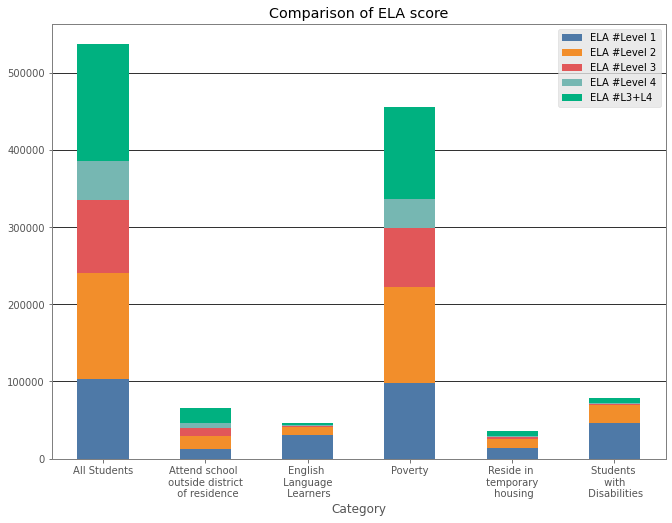

In [34]:
colors = ["#4e79a7", "#f28e2b","#e15759", '#76b7b2', '#00b180']

graph_by_ela = group_by_ela.loc[:, ['ELA #Level 1', 'ELA #Level 2', 'ELA #Level 3', 'ELA #Level 4', 'ELA #L3+L4']].plot.bar(stacked=True, color=colors, figsize=(11,8), title="Comparison of ELA score")

view_graph(graph_by_ela)

In [35]:
group_by_gen = sorted_df.groupby(by="Category").agg({'#Male':"sum", "#Female":"sum"})

group_by_gen

,#Male,#Female
Category,,
All Students,326287,311083
Attend school outside district of residence,35341,34785
English Language Learners,53570,44039
Poverty,276594,263806
Reside in temporary housing,31023,29987
Students with Disabilities,78798,40262


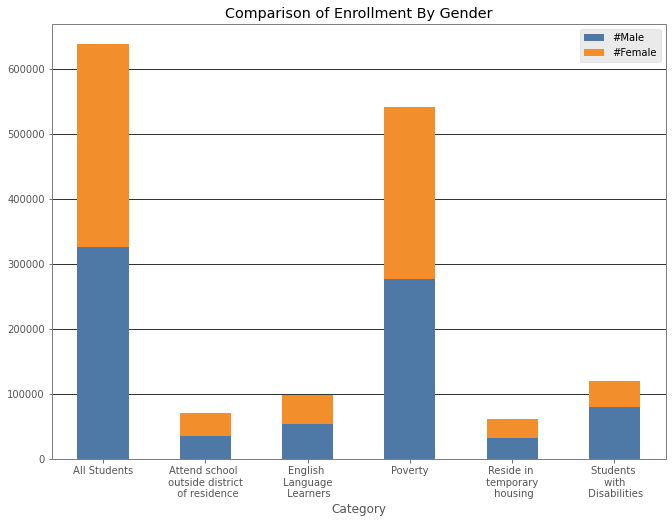

In [36]:
colors = ["#4e79a7", "#f28e2b","#e15759", '#76b7b2', '#00b180']

graph_by_gen = group_by_gen.loc[:, ['#Male', '#Female']].plot.bar(stacked=True, color=colors, figsize=(11,8), title="Comparison of Enrollment By Gender")

view_graph(graph_by_gen)

In [37]:
group_by_class = sorted_df.groupby(by="Category").agg({"Total Enrollment": "sum", '#Grade K':"sum",'#Grade 1':"sum", '#Grade 2':"sum", '#Grade 3':"sum", '#Grade 4':"sum", '#Grade 5':"sum", '#Grade 6':"sum", '#Grade 7':"sum", '#Grade 8':"sum"})

group_by_class

,Total Enrollment,#Grade K,#Grade 1,#Grade 2,#Grade 3,#Grade 4,#Grade 5,#Grade 6,#Grade 7,#Grade 8
Category,,,,,,,,,,
All Students,639829.0,72216,75224,74470,74740,72355,70049,66243,66665,67517
Attend school outside district of residence,72402.0,4341,4859,5643,6034,6409,7053,9583,10925,12521
English Language Learners,98699.0,15663,16262,12885,10419,9352,7681,7727,7304,7471
Poverty,542491.0,56999,60414,60130,60356,58786,56902,61992,62707,63695
Reside in temporary housing,62172.0,7460,8009,8008,7260,6503,5862,5262,4771,4583
Students with Disabilities,119871.0,9405,11445,13200,14205,14676,14798,13893,13219,12696


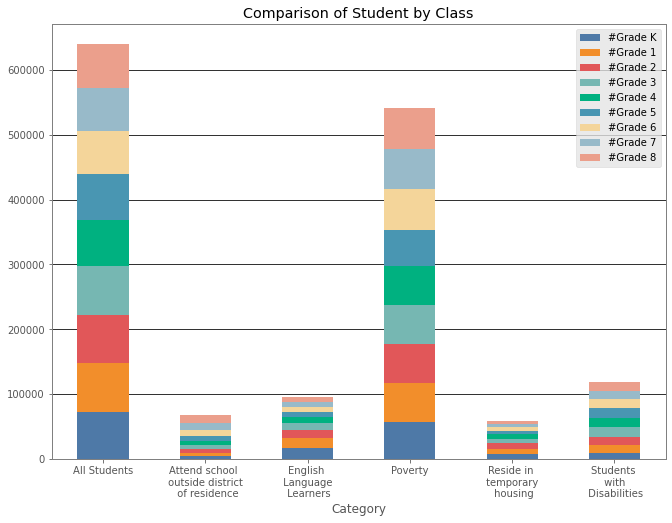

In [38]:
colors = ["#4e79a7", "#f28e2b","#e15759", '#76b7b2', '#00b180', "#4996b2", "#f4d59a", "#98bac9", "#eb9f8c"]

graph_by_class = group_by_class.loc[:, ['#Grade K','#Grade 1', '#Grade 2', '#Grade 3', '#Grade 4', '#Grade 5', '#Grade 6','#Grade 7', '#Grade 8']].plot.bar(stacked=True, color=colors, figsize=(11,8), title="Comparison of Student by Class")

view_graph(graph_by_class)